In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib
%matplotlib inline

# Import Data

In [2]:
# Create training and testing dataframes
train_df = pd.read_csv('kc_house_data_train.csv')
test_df = pd.read_csv('kc_house_data_test_features.csv')

# Modeling

In [3]:
# Print column names
print(train_df.keys())

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [4]:
# Function for creating year dummy variables
def set_years(df):
    df['year'] = df['date'].apply(lambda x: int(x[0:4]))
    for year in df['year'].unique():
        df[str(year)] = np.where(df['year'] == year, 1, 0)
    df.drop('year', axis=1, inplace=True)
    return None

# Create year dummy variables for dataframes
set_years(train_df)
set_years(test_df)

In [5]:
# Function for creating month dummy variables
def set_months(df):
    df['month'] = df['date'].apply(lambda x: int(x[4:6]))
    for month in df['month'].unique():
        df[str(month)] = np.where(df['month'] == month, 1, 0)
    columns = {'1':'jan', '2':'feb', '3':'mar', '4':'apr', '5':'may', '6':'jun',
              '7':'jul', '8':'aug', '9':'sep', '10':'oct', '11':'nov', '12':'dec'}
    df.rename(columns, axis=1, inplace=True)
    df.drop('month', axis=1, inplace=True)
    return None

# Create month dummy variables for dataframes
set_months(train_df)
set_months(test_df)

In [22]:
# Function to create newly_built column
def newly_built(df):
    filt = df['yr_renovated'] == 0
    df['newly_built'] = np.where(filt, 1, 0)
    return None

# Transform bedrooms outliers in dataframes 
newly_built(train_df)
newly_built(test_df)

In [23]:
# Function to transform bedrooms outliers
def bedrooms_trans(df):
    filt = df['bedrooms'] < 10
    df['bedrooms'] = np.where(filt, df['bedrooms'], 10)
    return None

# Transform bedrooms outliers in dataframes 
bedrooms_trans(train_df)
bedrooms_trans(test_df)

In [24]:
# Function to transform bathrooms outliers
def bathrooms_trans(df):
    low_filt = df['bathrooms'] > .5
    df['bathrooms'] = np.where(low_filt, df['bathrooms'], .5)
    high_filt = df['bathrooms'] < 5
    df['bathrooms'] = np.where(high_filt, df['bathrooms'], 5)
    return None

# Transform bedrooms outliers in dataframes 
bathrooms_trans(train_df)
bathrooms_trans(test_df)

# Create Params

In [25]:
# Function to create features list
def set_features(df):
    features = list(df.keys())
    remove = ['Unnamed: 0', 'id', 'price', 'date', 'yr_built',
              'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living']
    for f in remove:
        features.remove(f)
    return features

# Create features list for dataframes
train_features = set_features(train_df)
#test_features = set_features(test_df)

# EDA

In [26]:
# Print features list
print(train_features)

['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', '2014', '2015', 'oct', 'aug', 'mar', 'jul', 'may', 'apr', 'jan', 'jun', 'feb', 'sep', 'nov', 'dec', 'newly_built']


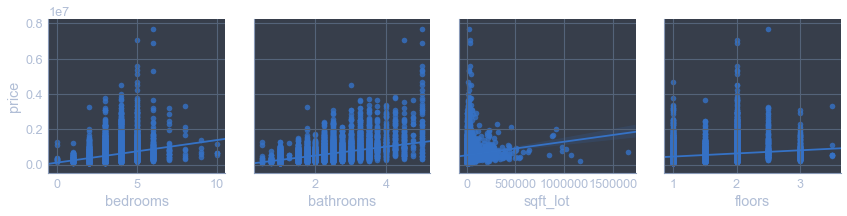

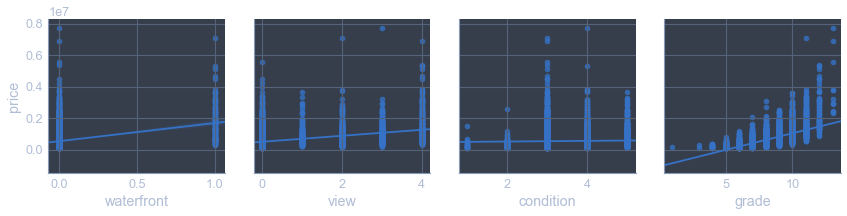

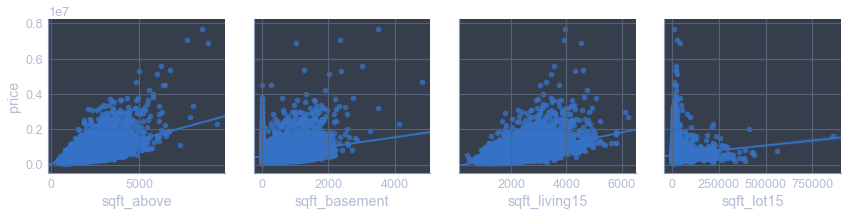

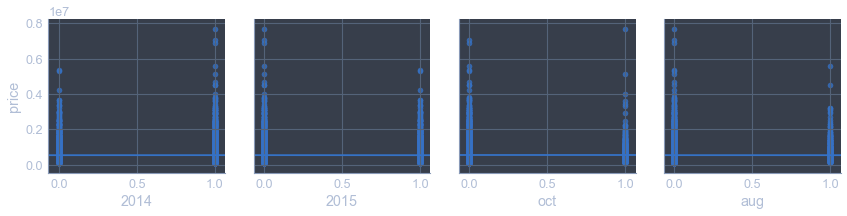

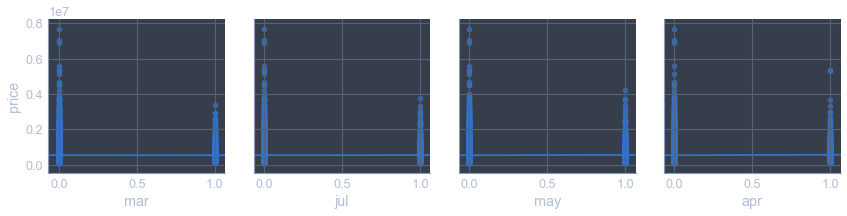

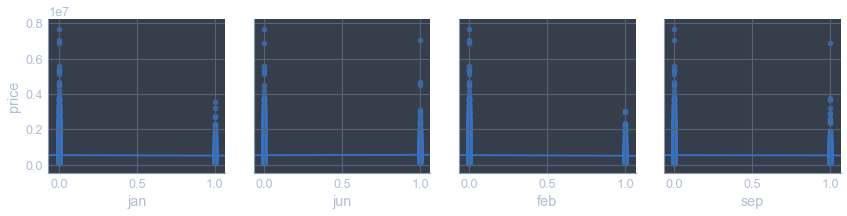

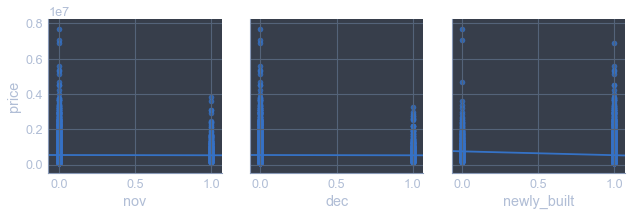

In [27]:
# Function to create feature pplots
def pplot_features(df, features):
    pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
    for row in pp_rows:
        pp = sns.pairplot(data=df, y_vars=['price'],
                          x_vars=row, kind="reg", height=3)
    return None

# Create feature pplots for training df
pplot_features(train_df, train_features)

# Run Model

In [28]:
train_df.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', '2014', '2015',
       'oct', 'aug', 'mar', 'jul', 'may', 'apr', 'jan', 'jun', 'feb', 'sep',
       'nov', 'dec', 'newly_built'],
      dtype='object')

In [29]:
# Function to create regression model
def set_model(df, features):
    formula = 'price~' + '+'.join([f'{ft}' for ft in features])
    model = smf.ols(formula=formula, data=df).fit()
    return model.summary()

In [30]:
set_model(train_df, train_features)

PatsyError: numbers besides '0' and '1' are only allowed with **
    price~bedrooms+bathrooms+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+sqft_living15+sqft_lot15+2014+2015+oct+aug+mar+jul+may+apr+jan+jun+feb+sep+nov+dec+newly_built
                                                                                                                               ^^^^

# Notes (TESTING)

In [14]:
# Recreate dataframe without any added columns
TESTING = pd.read_csv('kc_house_data_train.csv')
TESTING_FEATURES = set_features(TESTING)

In [15]:
set_model(TESTING, TESTING_FEATURES)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2235.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        00:12:13   Log-Likelihood:            -2.3827e+05
No. Observations:               17290   AIC:                         4.766e+05
Df Residuals:                   17277   BIC:                         4.767e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.989e+05   1.97e+04    -35.526      0.000   -7.37e+05    -6.6e+05
bedrooms      -3.453e+04   2403.132    -14.370      0.000   -3.92e+04   -2.98e+04
bathrooms     -1.696e+04   3929.181     -4.317      0.000   -2.47e+04   -9259.702
sqft_living     138.0560      2.871     48.085      0.000     132.428     143.684
sqft_lot          0.0237      0.059      0.399      0.690      -0.093       0.140
floors        -3659.7055   4524.986     -0.809      0.419   -1.25e+04    5209.725
waterfront     5.968e+05   2.19e+04     27.192      0.000    5.54e+05     6.4e+05
view            5.88e+04   2698.104     21.795      0.000    5.35e+04    6.41e+04
condition      5.498e+04   2860.438     19.220      0.000    4.94e+04    6.06e+04
grade          1.005e+05   2691.904     37.322      0.000    9.52e+04    1.06e+05
sqft_above       55.0938      2.861     19.259      0.000      49.486      60.701
sqft_basement    82.9622      3.314     25.038      0.000      76.467      89.457
sqft_living15    10.5564      4.342      2.431      0.015       2.045      19.068
sqft_lot15       -0.7294      0.093     -7.865      0.000      -0.911      -0.548
==============================================================================
Omnibus:                    13209.164   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           909371.834
Skew:                           3.103   Prob(JB):                         0.00
Kurtosis:                      37.982   Cond. No.                     1.64e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Unused Functions

In [ ]:
# Function to create target variable
def set_target(df):
    target = df['price']
    return target

# Create target variable for dataframes
#train_target = set_target(train_df)
#test_target = set_target(test_df)